# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Gapminder数据练习" data-toc-modified-id="Gapminder数据练习-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gapminder数据练习</a></div><div class="lev2 toc-item"><a href="#思考问题" data-toc-modified-id="思考问题-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>思考问题</a></div><div class="lev2 toc-item"><a href="#一维数据结构" data-toc-modified-id="一维数据结构-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>一维数据结构</a></div><div class="lev3 toc-item"><a href="#NumPy——Array" data-toc-modified-id="NumPy——Array-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>NumPy——Array</a></div><div class="lev3 toc-item"><a href="#Numpy_Array-另一个优点是支持向量运算" data-toc-modified-id="Numpy_Array-另一个优点是支持向量运算-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Numpy_Array 另一个优点是支持向量运算</a></div><div class="lev2 toc-item"><a href="#归一化数据" data-toc-modified-id="归一化数据-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>归一化数据</a></div><div class="lev2 toc-item"><a href="#NumPy-Index-Arrays" data-toc-modified-id="NumPy-Index-Arrays-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>NumPy Index Arrays</a></div><div class="lev2 toc-item"><a href="#+-vs.-+=" data-toc-modified-id="+-vs.-+=-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>+ vs. +=</a></div><div class="lev2 toc-item"><a href="#Pandas-Series" data-toc-modified-id="Pandas-Series-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pandas Series</a></div><div class="lev3 toc-item"><a href="#Series-索引" data-toc-modified-id="Series-索引-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Series 索引</a></div><div class="lev3 toc-item"><a href="#去除结果集的-NaN" data-toc-modified-id="去除结果集的-NaN-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>去除结果集的 NaN</a></div><div class="lev3 toc-item"><a href="#非内置函数" data-toc-modified-id="非内置函数-163"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>非内置函数</a></div><div class="lev2 toc-item"><a href="#在-Pandas-中绘图" data-toc-modified-id="在-Pandas-中绘图-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>在 Pandas 中绘图</a></div>

# Gapminder数据练习

本次练习的源据取自 [gapminder.org](http://www.gapminder.org/data/)

包含的变量有：
- 15 岁以上人口就业率 (%)
- 平均寿命（年）
- 人均 GDP（美元，已经过通胀调整)
- 小学完成率（% 男生）
- 小学完成率（% 女生）

> 然而GFW把这个网站墙了，一直连不上。。。  
本练习使用课程提供的本地数据源如下：
- employment-above-15.csv
- life-expectancy.csv
- gdp-per-capita.csv
- male-completion-rate.csv
- female-completion-rate.csv

## 思考问题

1. 各国就业率的变化趋势
2. 中国的人均GDP排名变化
3. 平均寿命与人均GDP是否存在相关性
4. 男女之间在小学完成率的比较（按国家区分）
5. 结合就业率和人均GDP的全球变化，寻找经济周期

上一节课 利用`Python`读取CSV并解析  
本次利用 pandas 库，可以加快处理速度（尽管导入andas库会相对较慢

In [1]:
%%time
import pandas as pd

Wall time: 2.54 s


In [9]:
%%time
daily_engagement = pd.read_csv('daily-engagement-full.csv')

Wall time: 15.4 s


In [16]:
%%time
len(daily_engagement['acct'].unique())

Wall time: 158 ms


1237

## 一维数据结构

|Pandas|NumPy|
|:------:|:-----:|
|series|array|
|有更多功能|使用比较简单|

`Pandas_Series`是建立在`NumPy_array`基础之上的。所以需要先掌握`NumPy_array`，再学习`Pandas_series`

### NumPy——Array

`Numpy`的`Array`跟`Python`的`List`相似，包括一个序列的元素（这些元素可以是任何数据）  

|相同点|不同点|
|:------:|:------:|
|按顺序排列，通过位置获取元素<br/>如：a[0] -> 'Str'|Array中各个元素都需属于同一个类别|
|可利用数据切片<br/>如：a[1:3]|NumPy有很多方便使用的函数<br/>如：计算平均值和标准偏差的函数|
|可使用for循环<br/>for x in a:|Array可以是多维的|


创建 Array 的方法：先创建Python的List，然后作为参数，调用 numpy.array()

In [12]:
%%time
import numpy as np

# 就业率数据的前二十个国家
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# 这20个国家在2007年的就业率数据
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

# 访问元素 Accessing elements
if True:
    print countries[0]
    print countries[3]

# 切片 Slicing
if True:
    print countries[0:3]
    print countries[:3]
    print countries[17:]
    print countries[:]
    
# 元素类型 Element types
if True:
    print countries.dtype  # |S22   S 表示字符串，22 表示数组中最长的字符串的长度
    print employment.dtype
    print np.array([0, 1, 2, 3]).dtype
    print np.array([1.0, 1.5, 2.0, 2.5]).dtype
    print np.array([True, False, True]).dtype
    print np.array(['al', 'ak', 'az']).dtype

# 循环 Looping
if True:
    for country in countries:
        print 'Examining country {}'.format(country)
    
    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        print 'Country {} has employment {}'.format(country, country_employment)
    
# Numpy函数 Numpy functions
if True:
    print employment.mean()
    print employment.std()
    print employment.max()
    print employment.sum()

Afghanistan
Angola
['Afghanistan' 'Albania' 'Algeria']
['Afghanistan' 'Albania' 'Algeria']
['Bhutan' 'Bolivia' 'Bosnia and Herzegovina']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']
|S22
float64
int32
float64
bool
|S2
Examining country Afghanistan
Examining country Albania
Examining country Algeria
Examining country Angola
Examining country Argentina
Examining country Armenia
Examining country Australia
Examining country Austria
Examining country Azerbaijan
Examining country Bahamas
Examining country Bahrain
Examining country Bangladesh
Examining country Barbados
Examining country Belarus
Examining country Belgium
Examining country Belize
Examining country Benin
Examining country Bhutan
Examining country Bolivia
Examining country Bosnia and Herzegovina
Country Afghanistan has employment 55.70000076
Count

In [13]:
def max_employment(countries, employment):
    '''
    在给定的employment中，返回最大的那条记录
    '''
    max_value = employment.max()
    
    i = 0
    for data in employment:
        if data == max_value:
            break
        i += 1
        
    max_country = countries[i]
    
    return (max_country, max_value)

```python
# 原始做法
def max_employment(countries, employment):
    max_country = None
    max_value = 0
    
    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        
        if country_employment > max_value:
            max_country = country
            max_value = country_employment
    
    return (max_country, max_value)
```

In [14]:
# 利用 Numpy 的函数

def max_employment2(countries, employment):
    i = employment.argmax() # 最大值的位置
    return (countries[i], employment[i])

In [46]:
# 检验 max_employment函数

employments_full = pd.read_csv('employment-above-15.csv')

countries = employments_full['Country']

for i in  range(2000, 2008):
    column = str(i)
    employments = employments_full[column]
    c, e = max_employment2(countries, employments)
    print 'Country {} has the largest employment {} in {}'.format(c, e, i)


Country Tanzania has the largest employment 85.0999984741 in 2000
Country Burundi has the largest employment 84.3000030518 in 2001
Country Burundi has the largest employment 84.0 in 2002
Country Burundi has the largest employment 83.5999984741 in 2003
Country Burundi has the largest employment 83.4000015259 in 2004
Country Madagascar has the largest employment 84.3000030518 in 2005
Country Madagascar has the largest employment 84.0999984741 in 2006
Country Burundi has the largest employment 83.1999969482 in 2007


### Numpy_Array 另一个优点是支持向量运算

假设：向量一是[1,2,3]，向量二是[4,5,6]

线性代数定义的向量加法：  
[1,2,3] + [4,5,6] = [5,7,9]

乘以标量Scalar:  
[1,2,3] * 3 = [3,6,9]

Numpy支持的向量操作:

|Math Operations|Logical Operations|Comparison Operations|
|:---:|:---:|:---:|
|加法：+|与：&|大于：>|
|减法：-|或：\|大于等于：>=|
|乘法：\*|非：~|小于：<|
|除法：/||小于等于：<=|
|指数：\*\*||等于：==|
|||不等于：!=|

>位运算  
查看[此文章](https://en.wikipedia.org/wiki/Bitwise_operation)，进一步了解位运算。

>在 NumPy 中，a & b 执行 a 和 b 的“按位与”。这不一定要与执行“逻辑与”（“与”没有对应的向量版）的 a 和 b 相同。但是，如果 a 和 b 都是布尔型而非整数型数组，“按位与”和“逻辑与”的作用是一样的。

>如果你想要对整数型向量进行“逻辑与”计算，你可以使用 NumPy 函数 np.logical_and(a,b)，或者先把它们转换为布尔型向量。

>类似地，a | b 执行“按位或”，而 ~a 执行“按位非”。但是，如果数组包含布尔值，它们与执行“逻辑或”和“逻辑非”的效果是一样的。

>NumPy 也有类似的函数：[逻辑或](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_or.html)，[逻辑非](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_not.html)，用于对含整数型数值的数组进行逻辑运算。

>在答案中，我们要用 / 2.，而不是 / 2。注意 2 后面有一个句点。这是因为在 Python 2 中，将一个整数除以另一个整数 (2)，会舍去分数。所以如果输入是整数值，就会丢失信息。因此使用浮点数值 (2.)，我们就能保留结果小数点后的值了。


In [48]:
import numpy as np

# Change False to True for each block of code to see what it does

# Arithmetic operations between 2 NumPy arrays
if True:
    a = np.array([1, 2, 3, 4])
    b = np.array([1, 2, 1, 2])
    
    print a + b
    print a - b
    print a * b
    print a / b
    print a ** b

[2 4 4 6]
[0 0 2 2]
[1 4 3 8]
[1 1 3 2]
[ 1  4  3 16]


In [49]:
# Arithmetic operations between a NumPy array and a single number
if True:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print a + b
    print a - b
    print a * b
    print a / b
    print a ** b

[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[0 1 1 2]
[ 1  4  9 16]


In [50]:
# Logical operations with NumPy arrays
if True:
    a = np.array([True, True, False, False])
    b = np.array([True, False, True, False])
    
    print a & b
    print a | b
    print ~a
    
    print a & True
    print a & False
    
    print a | True
    print a | False

[ True False False False]
[ True  True  True False]
[False False  True  True]
[ True  True False False]
[False False False False]
[ True  True  True  True]
[ True  True False False]


In [51]:
# Comparison operations between 2 NumPy Arrays
if True:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([5, 4, 3, 2, 1])
    
    print a > b
    print a >= b
    print a < b
    print a <= b
    print a == b
    print a != b

[False False False  True  True]
[False False  True  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True False False]
[ True  True False  True  True]


In [52]:
# Comparison operations between a NumPy array and a single number
if True:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print a > b
    print a >= b
    print a < b
    print a <= b
    print a == b
    print a != b

[False False  True  True]
[False  True  True  True]
[ True False False False]
[ True  True False False]
[False  True False False]
[ True False  True  True]


In [54]:
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    # 一定要注意加上小括号！！！
    return (female_completion + male_completion) / 2.0

overall_completion_rate(female_completion, male_completion)

array([  96.416025,  102.644275,  101.41129 ,   93.316285,  103.455575,
         98.148215,  102.35113 ,   91.77855 ,   92.835475,   89.655755,
         99.218715,   98.484275,   94.172835,  117.335125,   98.275645,
         33.04039 ,   41.905225,   90.962965,   57.08404 ,   93.06015 ])

## 归一化数据

在数据分析中，经常会有一个问题：某一个数据点与其它数据点相比，有何区别？  
例如：中国的就业率跟其它国家有何差异？ 比平均值高还是低，相差多少？

做法：将各个数据点转换为相对于平均值的标准偏差（标准化数据）  
举例：2007年
- 平均水平：
- 标准偏差：
- 中国：
- 美国：

In [64]:
employment_2007 = employments_full['2007']
mean = np.mean(employment_2007)
sd   = np.std(employment_2007)

print 'Mean:', mean
print 'SD:', sd

i = 0
for country in employments_full['Country']:
    if country == 'China':
        employment_2007_China =  employment_2007[i]
    if country == 'United States':
        employment_2007_US = employment_2007[i]
    i += 1
    
print 'China:', employment_2007_China
print 'Diff:', employment_2007_China - mean, ' or ', (employment_2007_China - mean) / sd
print 'US:', employment_2007_US
print 'Diff:', employment_2007_US - mean, ' or ', (employment_2007_US - mean) / sd

Mean: 58.6359550819
SD: 10.489863809
China: 72.8000030518
Diff: 14.1640479699  or  1.35026042548
US: 62.2999992371
Diff: 3.6640441552  or  0.349293777492


In [65]:
def standardize_data(values):
    standardized_values = (values - values.mean()) / values.std()
    return standardized_values

## NumPy Index Arrays

a = [1, 2, 3, 4, 5]
b = [False, False, True, True, True]

a[b] = [3, 4, 5]

我们称 b 为索引数组 index array。保留 True 的元素，过滤掉 False的元素。

甚至不需要变量b：  
a[a>2]，就是保留a数组中大于2的元素

In [70]:
a = np.array([1,2,3,4,5])
b = np.array([False,True,False,True,False])
print a[b]
print a[a>2]

[2 4]
[3 4 5]


In [71]:
# Using index arrays
if True:
    a = np.array([1, 2, 3, 4])
    b = np.array([True, True, False, False])
    
    print a[b]
    print a[np.array([True, False, True, False])]

[1 2]
[1 3]


In [73]:
# Creating the index array using vectorized operations
if True:
    a = np.array([1, 2, 3, 2, 1])
    b = (a >= 2)
    
    print b
    print a[b]
    print a[a >= 2]

[False  True  True  True False]
[2 3 2]
[2 3 2]


In [74]:
# Creating the index array using vectorized operations on another array
if True:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([1, 2, 3, 2, 1])
    
    print b == 2
    print a[b == 2]

[False  True False  True False]
[2 4]


In [78]:
# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    Fill in this function to calculate the mean time spent in the classroom
    for students who stayed enrolled at least (greater than or equal to) 7 days.
    Unlike in Lesson 1, you can assume that days_to_cancel will contain only
    integers (there are no students who have not canceled yet).
    
    The arguments are NumPy arrays. time_spent contains the amount of time spent
    in the classroom for each student, and days_to_cancel contains the number
    of days until each student cancel. The data is given in the same order
    in both arrays.
    '''
    return time_spent[days_to_cancel >= 7].mean()

print mean_time_for_paid_students(time_spent, days_to_cancel)

41.0540034855


## \+ vs. +=

指向的问题:  
-  \+ 会先创建一个新的数组
-  += 是直接在原数组上进行操作

+= 是原位操作 operate in-place  
\+ 并非原位操作

In [79]:
a = np.array([1,2,3,4])
b = a
a += np.array([1,1,1,1])
print b

[2 3 4 5]


In [80]:
a = np.array([1,2,3,4])
b = a
a = a + np.array([1,1,1,1])
print b

[1 2 3 4]


In [85]:
a = np.array([1,2,3,4,5])
slice = a[:3]  # 并没有创建新的数组
slice[0] = 100
print a

[100   2   3   4   5]


## Pandas Series

`Pandas Series` 和 `Numpy Array` 相似

|相同点|不同点|
|:------:|:------:|
|按顺序排列，通过位置获取元素<br/>如：a[0] -> 'Str'|Series有些函数Numpy没有<br/>如：describe()|
|可利用数据切片<br/>如：a[1:3]|Series 有索引|
|可使用for循环<br/>for x in a:||
|可调用相同的函数<br/>如：mean()、max()||
|用向量进行运算||


In [111]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [87]:
# Accessing elements and slicing
if True:
    print life_expectancy[0]
    print gdp[3:6]

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [89]:
# Looping
if True:
    for country_life_expectancy in life_expectancy:
        print 'Examining life expectancy {}'.format(country_life_expectancy)

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [90]:
# Pandas functions
if True:
    print life_expectancy.mean()
    print life_expectancy.std()
    print gdp.max()
    print gdp.sum()

72.87
6.21399947487
27036.4873319
182957.59833


In [91]:
# Vectorized operations and index arrays
if True:
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print a + b
    print a * 2
    print a >= 3
    print a[a >= 3]

0    2
1    4
2    4
3    6
dtype: int64
0    2
1    4
2    6
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [114]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    num_same_direction = 0        # Replace this with your code
    num_different_direction = 0   # Replace this with your code
    
    mean1 = variable1.mean()
    mean2 = variable2.mean()
    
    both_above = (variable1 > mean1) & (variable2 > mean2)
    both_below = (variable1 < mean1) & (variable2 < mean2)
    
    is_same_direction = both_above | both_below
    num_same_direction = is_same_direction.sum()
    
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

In [115]:
variable_correlation(life_expectancy, gdp)

(17, 3)

大部分数对的方向相同，说明这两个变量是正相关（也就是当一个值较大时另一个值也会较大）。若大部分方向相反，则是负相关

### Series 索引

- 创建 Series 时，可以指定索引 pd.Series(data_values, index=XX)。 若不指定，则默认为位置信息
- `argmax()` 返回最大值的索引  
- `loc['索引']` 是通过索引找对应的值（类似DICT）

In [121]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]

employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas argmax() function. Documention is
    here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.argmax.html
    '''
    max_country = None      # Replace this with your code
    max_value = None   # Replace this with your code
    
    max_country =  employment.argmax()
    max_value = employment.loc[max_country]
    
    return (max_country, max_value)

max_employment(employment)

('Angola', 75.699996949999999)

Series 的索引对向量运算会有有趣的影响，have a try  
- 值的匹配是根据索引而不是位置进行的
- 某索引值只存在其中一个series，其结果值就是 NaN

In [122]:
# Addition when indexes are the same
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print s1 + s2

a    11
b    22
c    33
d    44
dtype: int64


In [123]:
# Indexes have same elements in a different order
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print s1 + s2

a    31
b    12
c    43
d    24
dtype: int64


In [124]:
# Indexes overlap, but do not have exactly the same elements
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [125]:
# Indexes do not overlap
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


### 去除结果集的 NaN

去除 NaN，通过Google搜索，得知有一个函数 dropna()。然而这个函数是用在 DataFrame 的。尽管如此，也要试一下Series是否能用！

In [152]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
test = s1 + s2
print test.dropna()

c    13.0
d    24.0
dtype: float64


利用搜索引擎去了解 Pandas Series 的功能！！！  
以下都是去除结果集中存在 NaN 的方法：

In [153]:
# 在相加之前，先将默认值填充为零
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
for key in dict(s2):
    if key not in s1:
        s1[key] = 0
for key in dict(s1):
    if key not in s2:
        s2[key] = 0
print s1 + s2

a     1
b     2
c    13
d    24
e    30
f    40
dtype: int64


In [168]:
# series.index.values 可以获得所有 index
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
# 填充 s2
for x in s1.index.values:
    if x not in s2:
        s2[x] = 0
# 填充 s1
for x in s2.index.values:
    if x not in s1:
        s1[x] = 0
print s1 + s2

a     1
b     2
c    13
d    24
e    30
f    40
dtype: int64


In [154]:
# 利用 Pandas 的 isnull() 和 notnull()
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
judge = pd.notnull(test)
print test[judge]

c    13.0
d    24.0
dtype: float64


In [155]:
# 利用 add（）
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
print s1.add(s2, fill_value=0)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


### 非内置函数

当遇到要解决的问题无法直接使用内置函数（例如 mean()），或者无法使用向量运算时：
1. 将 Series 视为 List （使用 for 循环）
2. 使用 apply()函数 ( series.apply(func) )
 - apply 函数会载入series和处理函数func
 - 通过对 series 的每个元素调用处理函数func，来创建新 series
 - 类似于 Python 的 map()函数  

- 区别在于 map() 作用于 List，apply()作用于 Series

In [158]:
def show_week(day):
    if day == 6 or day == 7:
        return 'Weekend'
    else:
        return 'Workdays'
    
s1 = pd.Series([1,2,3,4,5,6,7])
print s1.apply(show_week)

0    Workdays
1    Workdays
2    Workdays
3    Workdays
4    Workdays
5     Weekend
6     Weekend
dtype: object


In [164]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_name(name):
    name_splited = name.split(' ')
    return name_splited[1]+', '+name_splited[0]

def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    return names.apply(reverse_name)

reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

## 在 Pandas 中绘图

> Pandas 还有在后台使用 matplotlib 的内置绘图函数，因此如果 data 是一个 Series，你可以使用 data.hist() 创建直方图。

> 在此情形中，这两者没有区别，但有时候 Pandas 封装器更加方便。例如，你可以使用 data.plot() 创建 Series 的线条图。Series 索引被用于 x 轴，值被用于 y 轴。

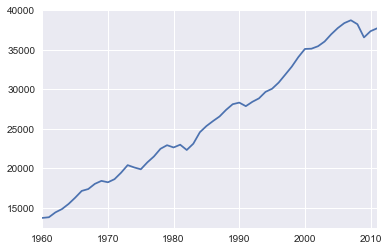

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = ''
employment = pd.read_csv(path + 'employment-above-15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female-completion-rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male-completion-rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life-expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp-per-capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# Uncomment the following line of code to see the available country names
# print employment.index.values

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".

#employment_us.hist(bins=8)
#employment_us.plot()
gdp_us.plot()

In [179]:
employment_chn = employment.loc['China']
female_completion_chn = female_completion.loc['China']
male_completion_chn = male_completion.loc['China']
life_expectancy_chn = life_expectancy.loc['China']
gdp_chn = gdp.loc['China']

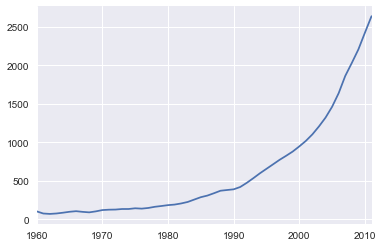

In [180]:
gdp_chn.plot()